# Basic Lewis Signaling Games
Employs Roth-Erev (Herrnstein) learning.

In [64]:
from game import World, Sender, Receiver
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio.v2 as imageio
from IPython.display import HTML
from time import time

In [65]:
# define constants
epochs = 1000
# seed = np.floor(time()).astype(int)
seed = 0
states = 3
actions = 3
signals = 3
initial_weights = 1e-6

In [72]:
def make_gif(filename_base):
    images = []
    nm = filename_base.split('-')[-1]
    for filename in [f'images/{nm}_{i}.png' for i in range(epochs) if i % 25 == 0]:
        images.append(imageio.imread(filename))
    imageio.mimsave(f'{filename_base}.gif', images, fps=6)
    # display(Image(filename=f'{filename_base}.gif'))
    display(HTML('<img src="{}">'.format(f'{filename_base}.gif')))


## Experiment

In [67]:
W = World(states, seed)
S = Sender(states, signals, q_not=initial_weights)
R = Receiver(signals, actions, q_not=initial_weights)

past_rewards = 0
matrices = []

In [68]:
for epoch in range(epochs):
    stimulus = W.get_state()
    signal = S.get_signal(stimulus)
    action = R.get_action(signal)
    reward = W.evaluate(action)
    past_rewards += reward
    S.update(reward)
    R.update(reward)

    if epoch % 25 == 0:
        plt.tight_layout(pad=0)
        plot = sns.heatmap(
            np.exp(R.action_weights) /
            np.exp(R.action_weights).sum(axis=0),
            square=True, cbar=False, annot=True, fmt='.1f'
        ).get_figure()
        plt.xlabel('messages')
        plt.ylabel('actions')
        plt.title(f'Receiver\'s weights, rollout {epoch}')
        plt.savefig(f"images/receiver_{epoch}.png")
        plt.clf()

        plot = sns.heatmap(
            np.exp(S.signal_weights) /
            np.exp(S.signal_weights).sum(axis=0),
            square=True, cbar=False, annot=True, fmt='.1f'
        ).get_figure()
        plt.xlabel('world states')
        plt.ylabel('messages')
        plt.title(f'Sender\'s weights, rollout {epoch}')
        plt.savefig(f"images/sender_{epoch}.png")
        plt.clf()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, last 100 epochs reward: {past_rewards/100}')
        print(f"Last State: {stimulus}, Signal: {signal}, Action: {action}, Reward: {reward}")
        past_rewards = 0

Epoch 0, last 100 epochs reward: 0.01
Last State: 0, Signal: 0, Action: 0, Reward: 1
Epoch 100, last 100 epochs reward: 0.66
Last State: 2, Signal: 0, Action: 2, Reward: 1
Epoch 200, last 100 epochs reward: 1.0
Last State: 0, Signal: 2, Action: 0, Reward: 1
Epoch 300, last 100 epochs reward: 1.0
Last State: 1, Signal: 1, Action: 1, Reward: 1
Epoch 400, last 100 epochs reward: 1.0
Last State: 1, Signal: 1, Action: 1, Reward: 1
Epoch 500, last 100 epochs reward: 1.0
Last State: 2, Signal: 0, Action: 2, Reward: 1
Epoch 600, last 100 epochs reward: 1.0
Last State: 2, Signal: 0, Action: 2, Reward: 1
Epoch 700, last 100 epochs reward: 1.0
Last State: 1, Signal: 1, Action: 1, Reward: 1
Epoch 800, last 100 epochs reward: 1.0
Last State: 2, Signal: 0, Action: 2, Reward: 1
Epoch 900, last 100 epochs reward: 1.0
Last State: 0, Signal: 2, Action: 0, Reward: 1


<Figure size 640x480 with 0 Axes>

In [73]:
make_gif(f'{states}-{actions}-{signals}-sender')

NameError: name 'HTML' is not defined

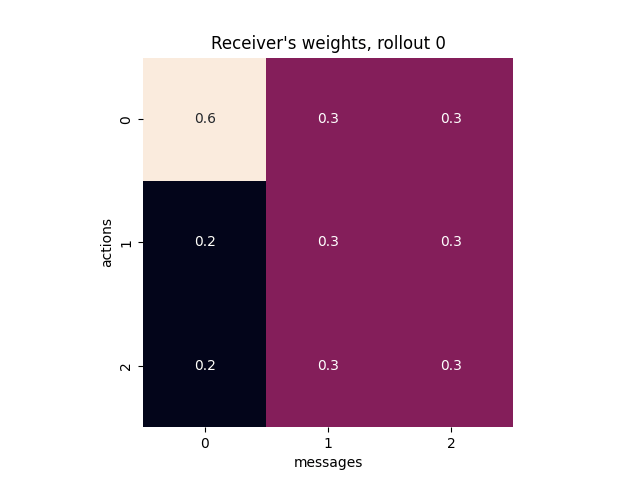

In [70]:
make_gif(f'{states}-{actions}-{signals}-receiver')

In [71]:
print("Observation to message mapping:")
print(S.signal_weights.argmax(1))
print("Message to action mapping:")
print(R.action_weights.argmax(1))

Observation to message mapping:
[2 1 0]
Message to action mapping:
[2 1 0]
